# Fashion MNIST

### 데이터 불러오기

In [96]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [98]:
from tensorflow.keras.datasets import fashion_mnist
fashion_mnist = keras.datasets.fashion_mnist

(X_train, Y_train), (X_test, Y_test) = \
    fashion_mnist.load_data()

In [99]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [100]:
X_train.shape,Y_train.shape

((60000, 28, 28), (60000,))

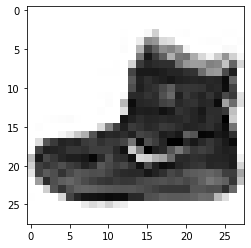

In [101]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [102]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	13	73	0	0	1	4	0	0	0	0	1	1	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	0	36	136	127	62	54	0	0	0	1	3	4	0	0	3	
0	0	0	0	0	0	0	0	0	0	0	0	6	0	102	204	176	134	144	123	23	0	0	0	0	12	10	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	155	236	207	178	107	156	161	109	64	23	77	130	72	15	
0	0	0	0	0	0	0	0	0	0	0	1	0	69	207	223	218	216	216	163	127	121	122	146	141	88	172	66	
0	0	0	0	0	0	0	0	0	1	1	1	0	200	232	232	233	229	223	223	215	213	164	127	123	196	229	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	183	225	216	223	228	235	227	224	222	224	221	223	245	173	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	193	228	218	213	198	180	212	210	211	213	223	220	243	202	0	
0	0	0	0	0	0	0	0	0	1	3	0	12	219	220	212	218	192	169	227	208	218	224	212	226	197	209	52	
0	0	0	0	0	0	0	0	0	0	6	0	99	244	222	220	218	203	198	221	215	213	222	220	245	119	167	56	
0	0	0	0	0	0	0	0	0	4	0	0	55	236	228	230	22

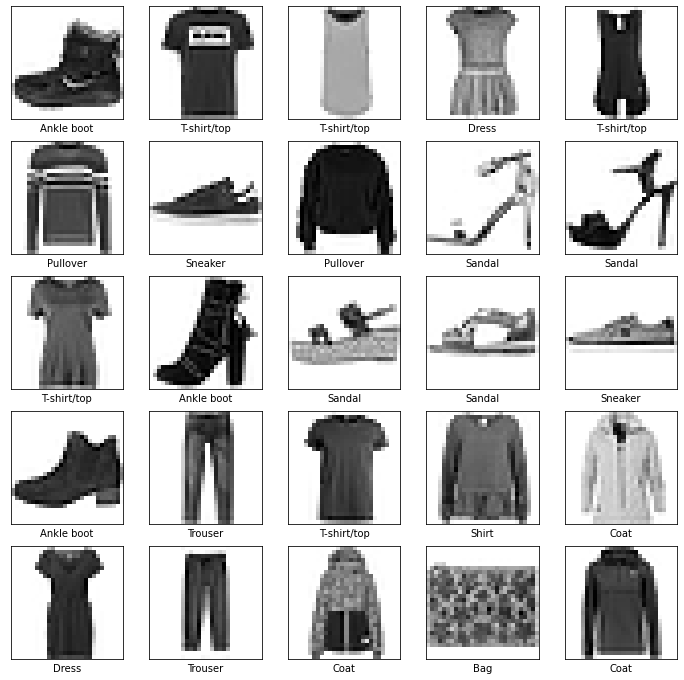

In [103]:
# 훈련 세트에서 처음 25개 이미지와 클래스 이름을 출력
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i]])
plt.show()

## 데이터 전처리

In [104]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_train = X_train / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float64') / 255

In [105]:
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [106]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [116]:
# model = Sequential([
#                     Conv2D(32, kernel_size=(3, 3), 
#                               input_shape=(28, 28, 1),  
#                               activation='relu'),
#                     MaxPooling2D(pool_size=(2,2)),
#                     Conv2D(64, (3, 3), activation='relu'),
#                     # MaxPooling2D(pool_size=(2,2)),
#                     Dropout(0.25),
#                     Flatten(),
#                     Dense(128,activation='relu'),
#                     Dropout(0.5),
#                     Dense(10,activation='softmax')
# ])
# model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_25 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               991360    
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)              

In [139]:
# Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2))
model.add(Dropout(0.25))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [140]:
model.compile(
    loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam'
)

In [141]:
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [142]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
history = model.fit(X_train,Y_train,validation_split=0.2,verbose=0,
                    epochs=100,batch_size=256,
                    callbacks=[checkpointer,early_stopping])


Epoch 00001: val_loss improved from inf to 0.51009, saving model to ./model/best001-0.5101.hdf5

Epoch 00002: val_loss improved from 0.51009 to 0.43801, saving model to ./model/best002-0.4380.hdf5

Epoch 00003: val_loss improved from 0.43801 to 0.38694, saving model to ./model/best003-0.3869.hdf5

Epoch 00004: val_loss improved from 0.38694 to 0.34863, saving model to ./model/best004-0.3486.hdf5

Epoch 00005: val_loss improved from 0.34863 to 0.32834, saving model to ./model/best005-0.3283.hdf5

Epoch 00006: val_loss improved from 0.32834 to 0.31537, saving model to ./model/best006-0.3154.hdf5

Epoch 00007: val_loss improved from 0.31537 to 0.30762, saving model to ./model/best007-0.3076.hdf5

Epoch 00008: val_loss improved from 0.30762 to 0.29279, saving model to ./model/best008-0.2928.hdf5

Epoch 00009: val_loss improved from 0.29279 to 0.28274, saving model to ./model/best009-0.2827.hdf5

Epoch 00010: val_loss improved from 0.28274 to 0.28129, saving model to ./model/best010-0.2813

In [138]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best030-0.2147.hdf5')
acc = best_model.evaluate(X_test, Y_test)
print(f"Accuracy: {acc[1]:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2298 - accuracy: 0.9171
Accuracy: 0.9171


### 기존코드

In [126]:
model = Sequential([
                    Conv2D(32, kernel_size=(3, 3), 
                              input_shape=(28, 28, 1),  
                              activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dropout(0.5),
                    Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)             

In [127]:
model.compile(
    loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam'
)

In [128]:
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [129]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss',patience=10)

In [130]:
history = model.fit(X_train,Y_train,validation_split=0.2,verbose=0,
                    epochs=100,batch_size=256,
                    callbacks=[checkpointer,early_stopping])


Epoch 00001: val_loss improved from inf to 0.45989, saving model to ./model/best001-0.4599.hdf5

Epoch 00002: val_loss improved from 0.45989 to 0.39606, saving model to ./model/best002-0.3961.hdf5

Epoch 00003: val_loss improved from 0.39606 to 0.35395, saving model to ./model/best003-0.3539.hdf5

Epoch 00004: val_loss improved from 0.35395 to 0.32764, saving model to ./model/best004-0.3276.hdf5

Epoch 00005: val_loss improved from 0.32764 to 0.31064, saving model to ./model/best005-0.3106.hdf5

Epoch 00006: val_loss improved from 0.31064 to 0.30137, saving model to ./model/best006-0.3014.hdf5

Epoch 00007: val_loss improved from 0.30137 to 0.29003, saving model to ./model/best007-0.2900.hdf5

Epoch 00008: val_loss improved from 0.29003 to 0.28071, saving model to ./model/best008-0.2807.hdf5

Epoch 00009: val_loss improved from 0.28071 to 0.27163, saving model to ./model/best009-0.2716.hdf5

Epoch 00010: val_loss improved from 0.27163 to 0.26610, saving model to ./model/best010-0.2661

In [131]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best032-0.2201.hdf5')
acc = best_model.evaluate(X_test, Y_test)
print(f"Accuracy: {acc[1]:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2423 - accuracy: 0.9135
Accuracy: 0.9135


### 그래프

In [ ]:
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

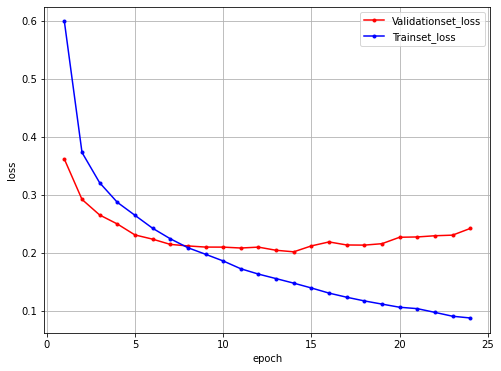

In [ ]:
import numpy as np

# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()